<a href="https://colab.research.google.com/github/surajpreetham/Data_science_codes/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is available online

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [96]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [97]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [99]:
df.shape

(768, 9)

In [100]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [101]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [102]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outlier detection

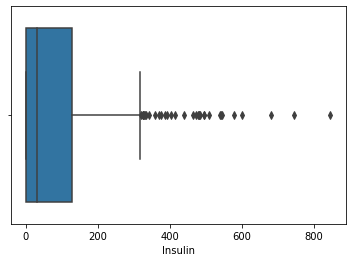

In [103]:
sns.boxplot(x = 'Insulin',data=df)
plt.show()

In [104]:
df = df[df['Insulin']<325]

In [105]:
df.shape

(735, 9)

In [106]:
q1 = df.Insulin.quantile(0.1)
q3 = df.Insulin.quantile(0.9)
IQR = q3-q1

df = df[(df['Insulin']>q1-1.5*IQR) & (df['Insulin']<q3+1.5*IQR)]

In [107]:
df.shape

(735, 9)

In [108]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,3.846259,119.248980,69.016327,20.014966,62.680272,31.862721,0.467354,33.194558,0.340136
std,3.382844,31.296974,19.612659,15.961587,79.652155,7.917459,0.322063,11.709540,0.474077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.100000,0.243500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,22.000000,0.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,137.500000,80.000000,32.000000,115.000000,36.450000,0.619000,40.500000,1.000000
max,17.000000,199.000000,122.000000,99.000000,321.000000,67.100000,2.420000,81.000000,1.000000


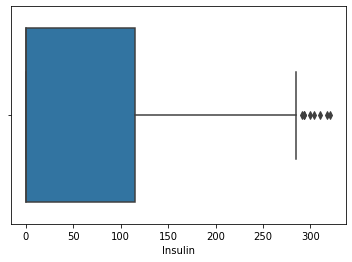

In [109]:
sns.boxplot(x = 'Insulin',data=df)


In [110]:
df['Outcome'].value_counts()

0    485
1    250
Name: Outcome, dtype: int64

In [111]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.301031,108.791753,68.086598,19.36701,57.28866,30.16866,0.424715,31.247423
1,4.904000,139.536000,70.820000,21.27200,73.14000,35.14920,0.550072,36.972000


In [112]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']


In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [117]:
model = svm.SVC(kernel='linear')
model.fit(X_train,y_train)


SVC(kernel='linear')

In [119]:
X_train_pred = model.predict(X_train)
X_test_pred = model.predict(X_test)
training_accuracy = accuracy_score(X_train_pred,y_train)
testing_accuracy = accuracy_score(X_test_pred,y_test)

In [120]:
print(training_accuracy,testing_accuracy)

0.7776096822995462 0.7972972972972973


In [123]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(X_test_pred,y_test)
print(report)

cm = confusion_matrix(X_test_pred,y_test)
print(cm)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        52
           1       0.64      0.73      0.68        22

    accuracy                           0.80        74
   macro avg       0.76      0.78      0.77        74
weighted avg       0.81      0.80      0.80        74

[[43  9]
 [ 6 16]]


Model a predictive system

In [124]:
input_data = (4,100,85,0,0,36.6,0.191,30)
input_data_as_array = np.asarray(input_data)
input_data_reshape = input_data_as_array.reshape(1,-1)


In [133]:
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshape)
print(std_data)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [135]:
prediction = model.predict(std_data)
print(prediction)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


In [136]:
if(prediction[0]==0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

The person is not diabetic
